In [26]:
# KMeans clustering is implemented from scratch
# Mall_Customers dataset downloaded from Kaggle is used 
# Comparison with the sklearn library is also made

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Function to calculate the Euclidean distance between centroids and datapoints

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [28]:
class KMeansClustering:
    def __init__ (self, K= 5, max_iters= 100, plot_steps= False):
        self.K = K  
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of lists containing the required number of clusters
        self.clusters = [[] for _ in range(self.K)]
        # mean feature vector for each cluster
        self.centroids = []

    # Function to predict the clusters for each datapoint
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # randomly initialising initial centroids
        random_sample_indices = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[index] for index in random_sample_indices]


        # getting the optimal location of the centroids
        for _ in range(self.max_iters):
            # updating clusters
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # updating centroids 
            centroids_old = self.centroids
            if self.plot_steps:
                self.plot()
            self.centroids = self._get_centroids(self.clusters)
            # checking for convergence
            if self._is_converged(centroids_old, self.centroids):
                break

        #return cluster labels 
        return self._get_cluster_labels(self.clusters)
    
    # helper function to get the labels for each cluster
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_index, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_index
        return labels
    # helper function to create clusters
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for index, sample in enumerate(self.X):
            centroid_index = self._closest_centroid(sample, centroids)
            clusters[centroid_index].append(index)
        return clusters
    
    # helper function which finds the nearest centroid for each data point
    # uses Euclidean distance
    def _closest_centroid(self, sample, centroids):
         distances = [euclidean_distance(sample, point) for point in centroids]
         closes_index = np.argmin(distances)
         return closes_index

    # helper function to get the centroids of the created clusters    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_index, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis= 0)
            centroids[cluster_index] = cluster_mean
        return centroids 
    
    # function that checks whether the centoroids change after each round of iteration
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    # function to plot the final clusters
    def plot(self):
        fig, ax = plt.subplots(figsize= (8, 6))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker= "x", color= 'black', linewidth= 2)
        
        plt.show()

In [29]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
kmeans = KMeansClustering(K= 5)
X = data.iloc[:, 3:].to_numpy()
X.shape
# We need to convert our data to a numpy array

(200, 2)

In [40]:
kmeans = KMeansClustering(K= 5)
kmeans.predict(X)
# We can see the labels assigned to each of the 200 samples after using clustering

array([1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1.,
       4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4.,
       1., 4., 1., 4., 1., 4., 1., 4., 1., 2., 1., 4., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 3., 0., 2., 0., 3., 0., 3., 0., 2., 0., 3., 0.,
       3., 0., 3., 0., 3., 0., 2., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3.,
       0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0.,
       3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3.,
       0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0.])

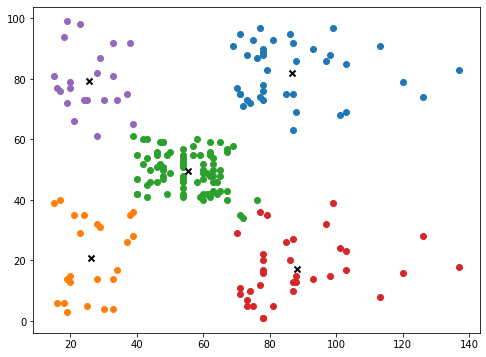

In [41]:
kmeans.plot()

In [44]:
# Using sklearn
from sklearn.cluster import KMeans

In [49]:
kmeans = KMeans(n_clusters= 5, n_init= 10)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

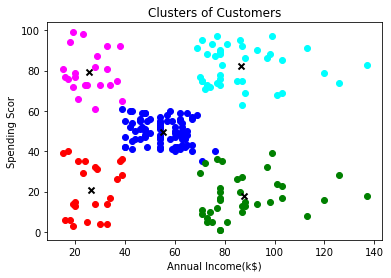

In [56]:
# Plotting clusters
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='red', label ='Cluster 1')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='blue', label ='Cluster 2')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], c='green', label ='Cluster 3')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], c='cyan', label ='Cluster 4')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], c='magenta', label ='Cluster 5')

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker= 'x', c='black', linewidth= 2, label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Scor')
plt.show()

In [ ]:
# As can be seen, there is a close agreement between our results and the results using the sklearn library